<a href="https://colab.research.google.com/github/PreethiR091/Preethi-24BAD091/blob/main/Preethi_R_24BAD091_ML_Ex_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Preethi R 24BAD091

----- Linear Regression Results -----
MSE : 4.5269991979286655
RMSE: 2.127674598694233
R2  : 0.7593582602709714


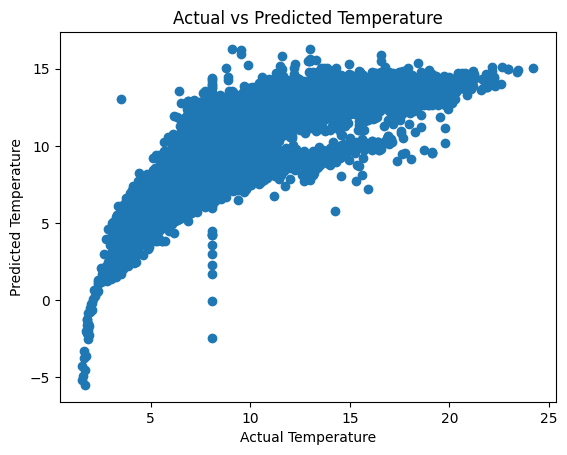

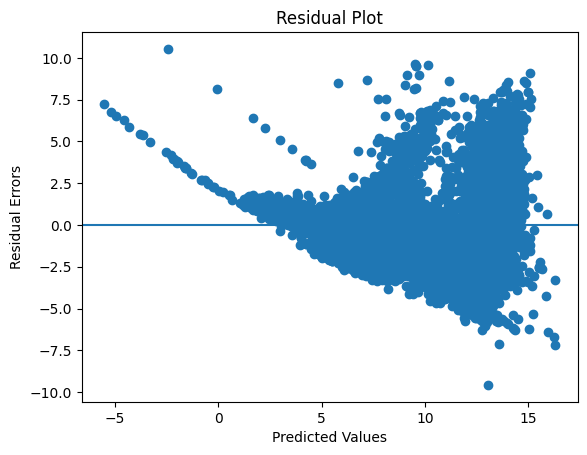

Ridge R2 Score: 0.7593574206495897
Lasso R2 Score: 0.7590987173345091


In [1]:
# EXP NO: 2 – SCENARIO 1
# Linear Regression – Ocean Temperature
print("Preethi R 24BAD091\n")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("bottle.csv",low_memory=False)

# Select available features and target
features = ['Depthm', 'Salnty', 'O2ml_L']
target = 'T_degC'

df = df[features + [target]]

# Handle missing values
df.fillna(df.median(), inplace=True)

# Split features and target
X = df[features]
y = df[target]

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Train Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("----- Linear Regression Results -----")
print("MSE :", mse)
print("RMSE:", rmse)
print("R2  :", r2)

# Actual vs Predicted plot
plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Temperature")
plt.ylabel("Predicted Temperature")
plt.title("Actual vs Predicted Temperature")
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure()
plt.scatter(y_pred, residuals)
plt.axhline(0)
plt.xlabel("Predicted Values")
plt.ylabel("Residual Errors")
plt.title("Residual Plot")
plt.show()

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
print("Ridge R2 Score:", r2_score(y_test, ridge_pred))

# Lasso Regression
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
print("Lasso R2 Score:", r2_score(y_test, lasso_pred))


Preethi R 24BAD091

----- Logistic Regression Results -----
Accuracy : 0.6132971506105834
Precision: 1.0
Recall   : 0.030612244897959183
F1 Score : 0.0594059405940594

Confusion Matrix:
 [[443   0]
 [285   9]]


/tmp/ipython-input-1991400205.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


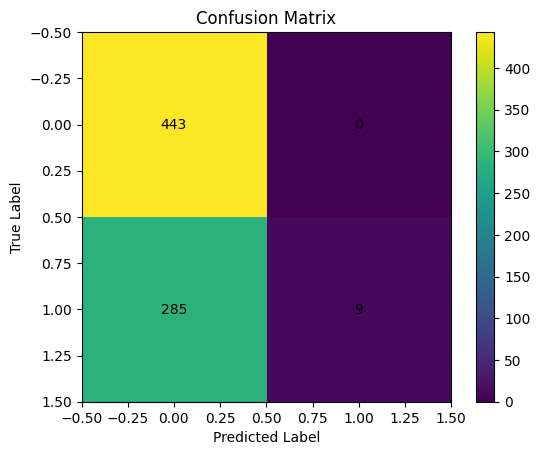

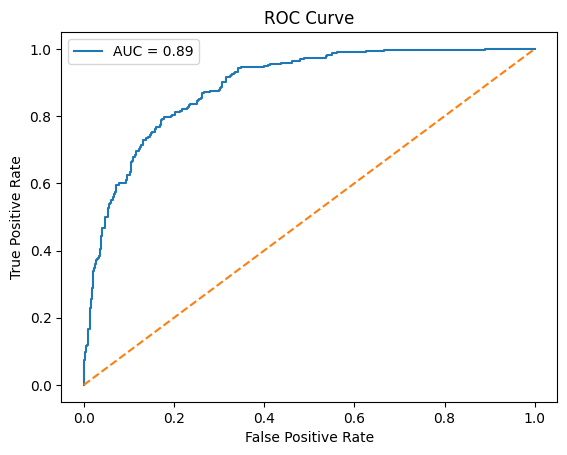


Feature Importance:
open     -6.396031
high      4.100663
low       2.301069
volume   -0.019189
dtype: float64

Tuned Model Accuracy: 0.6010854816824966


In [2]:
# EXP NO: 2 – SCENARIO 2
# Logistic Regression – LIC Stock Movement
print("Preethi R 24BAD091\n")

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score,
    recall_score, f1_score,
    confusion_matrix, roc_curve, auc
)

# Load dataset (CHANGE PATH IF NEEDED)
df = pd.read_csv("LICI - 10 minute data.csv")

# Create target variable
df['Price_Movement'] = (df['close'] > df['open']).astype(int)

# Select features and target
X = df[['open', 'high', 'low', 'volume']]
y = df['Price_Movement']

# Handle missing values
X.fillna(X.mean(), inplace=True)

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
print("----- Logistic Regression Results -----")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))

# Confusion Matrix (TEXT)
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

plt.figure()
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

for i in range(len(cm)):
    for j in range(len(cm)):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.show()

y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label="AUC = " + str(round(roc_auc, 2)))
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Feature importance (for output)
importance = pd.Series(
    model.coef_[0],
    index=['open', 'high', 'low', 'volume']
)
print("\nFeature Importance:")
print(importance)

# Hyperparameter tuning
model_tuned = LogisticRegression(C=0.1, penalty='l2', max_iter=1000)
model_tuned.fit(X_train, y_train)

y_tuned_pred = model_tuned.predict(X_test)
print("\nTuned Model Accuracy:",
      accuracy_score(y_test, y_tuned_pred))
